Example 4: Receiver Operating Characteristic (ROC)
In this page we look at how to draw ROC curves to evaluate classifiers

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# define function for creating & plotting 2-class synthetic data set
def generate_2class_data(class1Mean, class1Cov, class2Mean, class2Cov, size, plot=True):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, size)
    class1y = np.zeros(size)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, size)
    class2y = np.ones(size)
    
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
    return X,y

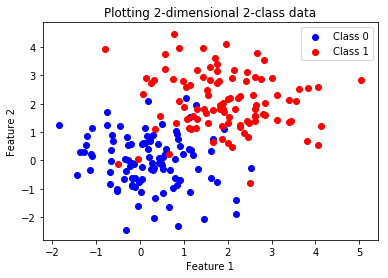

In [3]:
# creating synthetic data
class1Mean = [0, 0]
class2Mean = [2, 2]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov, 100)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# applying Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\vibandari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
scores = clf.decision_function(X_test)

In [6]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, scores)

In [7]:
fpr

array([0.        , 0.        , 0.        , 0.07692308, 0.07692308,
       0.15384615, 0.15384615, 0.30769231, 0.30769231, 0.53846154,
       0.53846154, 0.61538462, 0.61538462, 1.        ])

In [8]:
tpr

array([0.        , 0.03703704, 0.66666667, 0.66666667, 0.85185185,
       0.85185185, 0.88888889, 0.88888889, 0.92592593, 0.92592593,
       0.96296296, 0.96296296, 1.        , 1.        ])

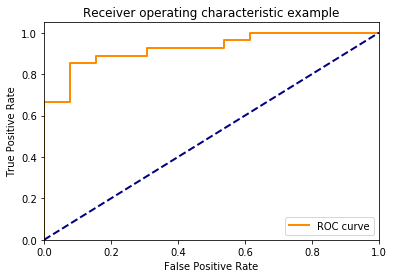

In [9]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

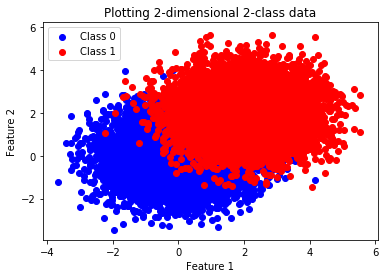

In [10]:
X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov, 10000)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# applying Logistic Regression
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

# applying SVM
clf2 = SVC(kernel = 'rbf', C = 100)
clf2.fit(X_train, y_train)

C:\Users\vibandari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vibandari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
scores_lr = clf1.decision_function(X_test)
scores_svm = clf2.decision_function(X_test)

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve( y_test, scores_lr)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve( y_test, scores_svm)

In [1]:
plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, color='green', lw=lw, label='SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: name 'plt' is not defined